# Data Wrangling Project
## 1. Gather
## 2. Assess
## 3. Clean

## Gather
###### Here we are going to get data from three sources.

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import json
from datetime import datetime
%matplotlib inline


In [98]:
# Reading from first source
df_twitter = pd.read_csv('twitter-archive-enhanced-2.csv')

In [99]:
# Reading from second source - images
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join('image_predictions.tsv'), mode = 'wb') as file:
    file.write(response.content)
image_pred = pd.read_csv('image_predictions.tsv', sep = '\t')

In [100]:
# Reading from the third source - Twitter
# Unfortunately I couldn't get access to the Twitter Developer Account Credentials
twitter_data = []
with open('tweet-json.txt', 'r', encoding='utf8') as file:
    for line in file:
        tweet = json.loads(line)
        twitter_data.append({
            'tweet_id': tweet['id'],
            'favorites': tweet['favorite_count'],
            'retweets': tweet['retweet_count']})

df_twitter_api = pd.DataFrame(twitter_data)

## Assess
###### Here we are going to asess the collected data. We will do visual and programattic assessment.

In [101]:
df_twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [102]:
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [103]:
df_twitter_api

,favorites,retweets,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256
5,20562,3261,891087950875897856
6,12041,2158,890971913173991426
7,56848,16716,890729181411237888
8,28226,4429,890609185150312448
9,32467,7711,890240255349198849


In [104]:
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [105]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [106]:
df_twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [107]:
df_twitter.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [108]:
df_twitter.duplicated().sum()

0

In [109]:
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [110]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [111]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [112]:
image_pred.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
457,674781762103414784,https://pbs.twimg.com/media/CV1ObvEWcAA7c6i.jpg,1,ocarina,0.148975,False,hamster,0.068985,False,wool,0.031728,False


In [113]:
image_pred['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
Eskimo_dog                    18
beagle                        18
Shetland_sheepdog             18
Maltese_dog                   18
teddy                         18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

In [114]:
df_twitter_api.head()

,favorites,retweets,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


In [115]:
df_twitter_api.sample()

,favorites,retweets,tweet_id
1952,769,265,673656262056419329


In [116]:
df_twitter_api.duplicated().sum()

0

In [117]:
df_twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorites    2354 non-null int64
retweets     2354 non-null int64
tweet_id     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [118]:
df_twitter_api.describe()

,favorites,retweets,tweet_id
count,2354.000000,2354.000000,2.354000e+03
mean,8080.968564,3164.797366,7.426978e+17
std,11814.771334,5284.770364,6.852812e+16
min,0.000000,0.000000,6.660209e+17
25%,1415.000000,624.500000,6.783975e+17
50%,3603.500000,1473.500000,7.194596e+17
75%,10122.250000,3652.000000,7.993058e+17
max,132810.000000,79515.000000,8.924206e+17


## Issues

#### Tidiness

1. Combining all data into one dataframe.
2. Differentiating based on dog stages (doggo|floofer|pupper|puppo). 


#### Quality
1. tweet_id must be integer.
2. timestamp and retweeted_status_timestamp must be of datetime.
3. Lowercase and trivial names.
4. p1, p2, p3 are in uppercase.
5. rating_numerator, rating_denominator in different columns.
6. retweet_status_id, retweeted_status_user_id, retweeted_status_timestamp are not required. 
7. Sources contain html tags.
8. Unnecessary columns in our dataset, not required for data analysis





## Clean
###### Here we are going to clean the data from three sources.

In [119]:
# But first we'll copy each of our gathered dataset to avoid any data loss
df_twitter_copy = df_twitter.copy()
image_pred_copy = image_pred.copy()
df_twitter_api_copy = df_twitter_api.copy()

## Tidiness Issues

### Issue 1

#### Define

Here we are going to joing all of the datasets. Based on tweet_id

#### Code

In [120]:
# Merge the datasets
temp_df = pd.merge(df_twitter_copy, df_twitter_api_copy, left_on = 'tweet_id', right_on = 'tweet_id', how = 'inner')
temp_df2 = pd.merge(temp_df, image_pred_copy, left_on = 'tweet_id', right_on = 'tweet_id', how = 'inner')
temp_df2.to_csv('twitter_archive_master.csv', index = False)
df_master = pd.read_csv('twitter_archive_master.csv')

#### Test

In [121]:
df_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [122]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
favorites                     2073 

### Issue 2

#### Define

Combining the dog_stages into a single column.

#### Code

In [123]:
# We are using the string extract function
df_master['dog_stages'] = df_master['text'].str.extract('(doggo|floofer|pupper|puppo)', expand = True)
df_master.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

#### Test

In [124]:
df_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN


In [125]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
favorites                     2073 non-null int64
retweets                      2073 non-null int64
jpg_url                       2073 non-null object
img_num                       2073 non-null int64
p1                            2073 non

## Quality Issues

### Issue 1

#### Define

tweet_id is of type integer, converting it to string type

#### Code

In [126]:
df_master['tweet_id'] = df_master['tweet_id'].astype(str)

#### Test

In [127]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id                      2073 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
favorites                     2073 non-null int64
retweets                      2073 non-null int64
jpg_url                       2073 non-null object
img_num                       2073 non-null int64
p1                            2073 no

### Issue 2

#### Define

timestamp and retweeted_status_timestamp, converting it to datetime

#### Code

In [128]:
df_master['timestamp'] = pd.to_datetime(df_master['timestamp'])
df_master['retweeted_status_timestamp'] = pd.to_datetime(df_master['retweeted_status_timestamp'])

#### Test

In [129]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id                      2073 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null datetime64[ns]
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null datetime64[ns]
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
favorites                     2073 non-null int64
retweets                      2073 non-null int64
jpg_url                       2073 non-null object
img_num                       2073 non-null int64
p1                   

### Issue 3

#### Define

A lot of the names are in lowercase and are unnecessary, changing it no Null

#### Code

In [130]:
df_master[df_master['name'].str[0].str.islower()]['name'].value_counts()

a               55
an               7
the              7
one              4
very             4
just             4
quite            3
getting          2
by               1
this             1
space            1
unacceptable     1
all              1
light            1
such             1
my               1
actually         1
incredibly       1
his              1
not              1
infuriating      1
officially       1
Name: name, dtype: int64

In [131]:
names_to_be_removed = ['None', 'a', 'the', 'an', 'one', 'just', 'very', 'quite', 'getting', 'his', 'all', 'space', 'actually', 'such', 
                       'incredibly', 'by', 'not', 'my', 'infuriating', 'this', 'light', 'unacceptable', 'officially']
df_master['name'] = df_master['name'].replace(names_to_be_removed, np.nan)

#### Test

In [132]:
# All of the names are now valid
df_master['name'].value_counts()

Charlie       11
Cooper        10
Oliver        10
Penny         10
Lucy          10
Tucker        10
Lola           8
Winston        8
Bo             8
Sadie          8
Daisy          7
Toby           7
Dave           6
Rusty          6
Jax            6
Stanley        6
Scout          6
Bailey         6
Milo           6
Bella          6
Koda           6
Alfie          5
Buddy          5
Oscar          5
Larry          5
Chester        5
Leo            5
Louis          5
Gus            4
Maggie         4
              ..
Apollo         1
Cecil          1
Kial           1
Gustav         1
Pavlov         1
Longfellow     1
Lupe           1
Josep          1
Kloey          1
Ginger         1
Jennifur       1
Pipsy          1
Tycho          1
Snicku         1
Thor           1
Jessiga        1
Mack           1
Jay            1
Ronnie         1
Nugget         1
Todo           1
Nigel          1
Chesterson     1
Deacon         1
Murphy         1
Cupid          1
Chase          1
Tom           

### Issue 4

#### Define

some p1, p2, p3 are in uppercase, changing them to lowercase

#### Code

In [133]:
df_master['p1'] = df_master['p1'].str.lower()
df_master['p2'] = df_master['p2'].str.lower()
df_master['p3'] = df_master['p3'].str.lower()

#### Test

In [134]:
df_master.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages
373,817056546584727552,NaN,NaN,2017-01-05 17:13:55,"<a href=""http://twitter.com/download/iphone"" r...",This is Chloe. She fell asleep at the wheel. A...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/817056546...,...,kelpie,0.864415,True,french_bulldog,0.097456,True,german_shepherd,0.008526,True,NaN
1894,669216679721873412,NaN,NaN,2015-11-24 18:11:04,"<a href=""http://twitter.com/download/iphone"" r...",This is Clarq. He's a golden Quetzalcoatl. Cla...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/669216679...,...,golden_retriever,0.992758,True,irish_setter,0.003379,True,saluki,0.001230,True,NaN
2028,666781792255496192,NaN,NaN,2015-11-18 00:55:42,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Bacardi named Octaviath. Ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666781792...,...,italian_greyhound,0.618316,True,weimaraner,0.151363,True,vizsla,0.085989,True,NaN
561,786363235746385920,NaN,NaN,2016-10-13 00:29:39,"<a href=""http://twitter.com/download/iphone"" r...",This is Rizzo. He has many talents. A true ren...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/786363235...,...,golden_retriever,0.929266,True,labrador_retriever,0.062867,True,saluki,0.002157,True,doggo
11,889880896479866881,NaN,NaN,2017-07-25 16:11:53,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/889880896...,...,french_bulldog,0.377417,True,labrador_retriever,0.151317,True,muzzle,0.082981,False,NaN
1445,680836378243002368,NaN,NaN,2015-12-26 19:43:36,"<a href=""http://twitter.com/download/iphone"" r...",This is Ellie. She's secretly ferocious. 12/10...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/680836378...,...,pembroke,0.427781,True,shetland_sheepdog,0.160669,True,pomeranian,0.111250,True,pupper
1883,669375718304980992,NaN,NaN,2015-11-25 04:43:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Billl. He's trying to be a ghost but h...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/669375718...,...,airedale,0.168762,True,norfolk_terrier,0.107479,True,lakeland_terrier,0.097846,True,NaN
1874,669625907762618368,NaN,NaN,2015-11-25 21:17:12,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. She's having fun AND being safe...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/669625907...,...,seat_belt,0.874502,False,golden_retriever,0.055408,True,labrador_retriever,0.026854,True,NaN
1738,672169685991993344,NaN,NaN,2015-12-02 21:45:16,"<a href=""http://twitter.com/download/iphone"" r...",This is Bradley. That is his sandwich. He carr...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/672169685...,...,cocker_spaniel,0.991011,True,sussex_spaniel,0.004032,True,miniature_poodle,0.001276,True,NaN
1541,676821958043033607,NaN,NaN,2015-12-15 17:51:44,"<a href=""http://twitter.com/download/iphone"" r...",Finally some constructive political change in ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/676821958...,...,great_pyrenees,0.869804,True,kuvasz,0.079814,True,standard_poodle,0.013263,True,NaN


### Issue 5

#### Define

rating_numerator, rating_denominator are in different columns, putting them into a single column using Regular Expressions

#### Code

In [135]:
# Extracting using string extract method
ratings = df_master['text'].str.extract('(\d+(\.\d+)*\/\d+)')
df_master['rating'] = ratings[0]
df_master.drop(['rating_numerator', 'rating_denominator'], axis = 1, inplace = True)

#### Test

In [136]:
df_master.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages,rating
1200,697990423684476929,NaN,NaN,2016-02-12 03:47:39,"<a href=""http://twitter.com/download/iphone"" r...",This is Doug. He's a Draconian Jabbawockee. Ra...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/697990423...,...,0.984783,True,cardigan,0.015018,True,shetland_sheepdog,0.000074,True,NaN,11/10
1581,675534494439489536,NaN,NaN,2015-12-12 04:35:48,"<a href=""http://twitter.com/download/iphone"" r...",Seriously guys?! Only send in dogs. I only rat...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/675534494...,...,0.749368,True,schipperke,0.133738,True,newfoundland,0.049914,True,NaN,11/10
1804,670811965569282048,NaN,NaN,2015-11-29 03:50:10,"<a href=""http://twitter.com/download/iphone"" r...",Meet Maggie. She enjoys her stick in the yard....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/670811965...,...,0.994090,True,walker_hound,0.003973,True,beagle,0.001406,True,NaN,10/10
1827,670468609693655041,NaN,NaN,2015-11-28 05:05:47,"<a href=""http://twitter.com/download/iphone"" r...",This is Edd. He's a Czechoslovakian Googolplex...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/670468609...,...,0.730152,False,beach_wagon,0.078661,False,car_wheel,0.064346,False,NaN,10/10
261,833124694597443584,NaN,NaN,2017-02-19 01:23:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Gidget. She's a spy pupper. Stealthy a...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/833124694...,...,0.710523,True,kelpie,0.106102,True,shopping_cart,0.055475,False,pupper,12/10
1489,678800283649069056,NaN,NaN,2015-12-21 04:52:53,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper with some mean tan lines. Snaz...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/678800283...,...,0.213673,True,beagle,0.146235,True,airedale,0.122701,True,pupper,12/10
1061,709449600415961088,NaN,NaN,2016-03-14 18:42:20,"<a href=""http://twitter.com/download/iphone"" r...",Meet Karma. She's just a head. Lost body durin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/709449600...,...,0.780187,True,dandie_dinmont,0.074429,True,norfolk_terrier,0.033776,True,NaN,10/10
1819,670727704916926465,NaN,NaN,2015-11-28 22:15:21,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeffrie. He's a handheld pup. Excellen...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/670727704...,...,0.368562,False,tabby,0.309675,False,egyptian_cat,0.154914,False,NaN,10/10
399,813142292504645637,NaN,NaN,2016-12-25 22:00:04,"<a href=""http://twitter.com/download/iphone"" r...",Everybody stop what you're doing and look at t...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/813142292...,...,0.848735,True,ibizan_hound,0.044602,True,italian_greyhound,0.018611,True,NaN,13/10
1916,668826086256599040,NaN,NaN,2015-11-23 16:18:59,"<a href=""http://twitter.com/download/iphone"" r...",This is Banditt. He is a brown LaBeouf retriev...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/668826086...,...,0.640185,True,irish_terrier,0.153700,True,rhodesian_ridgeback,0.068457,True,NaN,10/10


In [137]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 26 columns):
tweet_id                      2073 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null datetime64[ns]
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null datetime64[ns]
expanded_urls                 2073 non-null object
name                          1396 non-null object
favorites                     2073 non-null int64
retweets                      2073 non-null int64
jpg_url                       2073 non-null object
img_num                       2073 non-null int64
p1                            2073 non-null object
p1_conf                       2073 non-null float64
p1_dog            

### Issue 6

#### Define

Removing the retweets columns, they are unnecessary

#### Code

In [138]:
retweet_cols = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
df_master.drop(retweet_cols, axis = 1, inplace = True)

#### Test

In [139]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 23 columns):
tweet_id                 2073 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2073 non-null datetime64[ns]
source                   2073 non-null object
text                     2073 non-null object
expanded_urls            2073 non-null object
name                     1396 non-null object
favorites                2073 non-null int64
retweets                 2073 non-null int64
jpg_url                  2073 non-null object
img_num                  2073 non-null int64
p1                       2073 non-null object
p1_conf                  2073 non-null float64
p1_dog                   2073 non-null bool
p2                       2073 non-null object
p2_conf                  2073 non-null float64
p2_dog                   2073 non-null bool
p3                       2073 non-null object
p3_conf           

### Issue 7

#### Define

The sources are not fully understandable, making them more readable for analysis.

#### Code

In [140]:
# Replacing the sources with much more readable and understandable text
df_master['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
                            'Twitter for iPhone', inplace = True)

df_master['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
                            'Twitter Web Client', inplace = True)

df_master['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>',
                            'TweetDeck', inplace = True)

#### Test

In [141]:
df_master['source'].value_counts()

Twitter for iPhone    2032
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

### Issue 8

#### Define

Removing unnecessary columns, which won't be used for data analysis and that file will be used for data analysis.

#### Code

In [142]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 23 columns):
tweet_id                 2073 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2073 non-null datetime64[ns]
source                   2073 non-null object
text                     2073 non-null object
expanded_urls            2073 non-null object
name                     1396 non-null object
favorites                2073 non-null int64
retweets                 2073 non-null int64
jpg_url                  2073 non-null object
img_num                  2073 non-null int64
p1                       2073 non-null object
p1_conf                  2073 non-null float64
p1_dog                   2073 non-null bool
p2                       2073 non-null object
p2_conf                  2073 non-null float64
p2_dog                   2073 non-null bool
p3                       2073 non-null object
p3_conf           

In [143]:
df_master.drop(['in_reply_to_status_id', 
              'in_reply_to_user_id',
              'name',
              'img_num',
              'timestamp',
              'expanded_urls'], axis = 1, inplace=True)

#### Test

In [144]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 17 columns):
tweet_id      2073 non-null object
source        2073 non-null object
text          2073 non-null object
favorites     2073 non-null int64
retweets      2073 non-null int64
jpg_url       2073 non-null object
p1            2073 non-null object
p1_conf       2073 non-null float64
p1_dog        2073 non-null bool
p2            2073 non-null object
p2_conf       2073 non-null float64
p2_dog        2073 non-null bool
p3            2073 non-null object
p3_conf       2073 non-null float64
p3_dog        2073 non-null bool
dog_stages    337 non-null object
rating        2073 non-null object
dtypes: bool(3), float64(3), int64(2), object(9)
memory usage: 232.9+ KB


In [145]:
# Saving to CSV
df_master.to_csv('twitter_archive_master.csv', index= False)

## Analysis and Insights
###### Here we are going to insights from the data we just cleaned.

In [146]:
df = pd.read_csv('twitter_archive_master.csv')

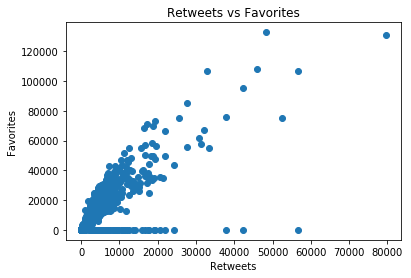

In [147]:
# Scatter Plot
plt.scatter(df['retweets'], df['favorites'])
plt.xlabel('Retweets')
plt.ylabel('Favorites')
plt.title('Retweets vs Favorites');

##### Insights
As we can see that there is a positive correlation between the favorites and the retweet, we could infer that the more the retweets the more they will be favorated.

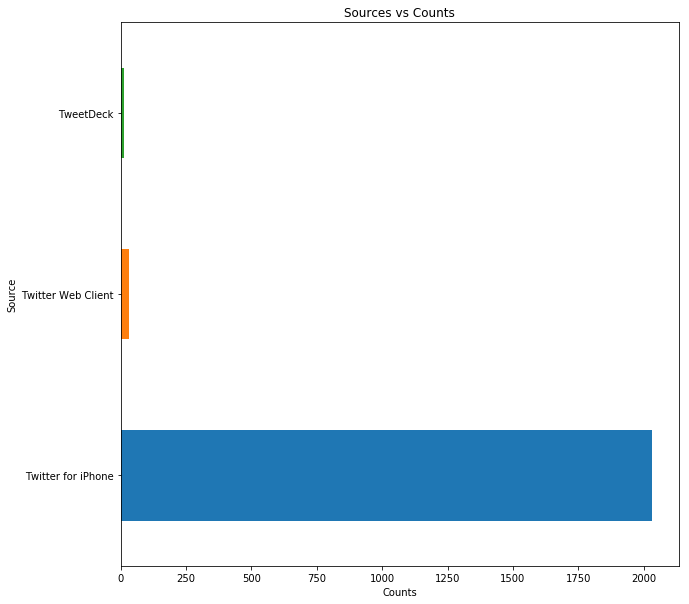

In [148]:
# Sources Plot
df['source'].value_counts().plot(kind = 'barh', figsize = (10,10))
plt.xlabel('Counts')
plt.ylabel('Source')
plt.title('Sources vs Counts');

In [149]:
df['source'].value_counts()

Twitter for iPhone    2032
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

##### Insights
We can see from the plot that most of our tweets came from iPhone, while TweetDeck is the source of only 11 tweets.

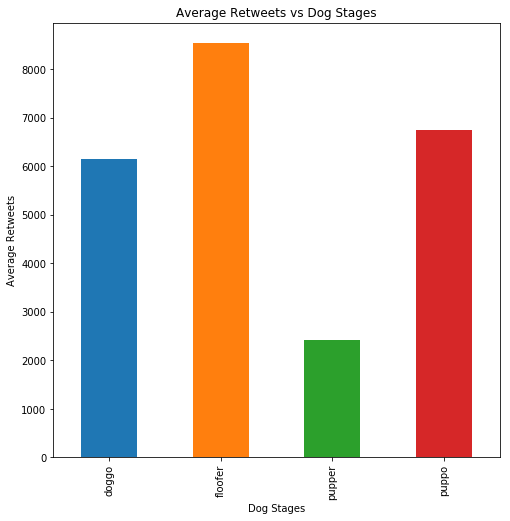

In [150]:
# Bar graph of most retweets for Dog stages
df.groupby('dog_stages')['retweets'].mean().plot(kind = 'bar', title = 'Average Retweets vs Dog Stages', figsize = (8,8))
plt.xlabel('Dog Stages')
plt.ylabel('Average Retweets');

##### Insights
Considering the dog stages and comparing it to the average retweets, we can see that floofer stage did the best while pupper is not so much retweeted.